### Census API guide

Brian Dew, @bd_econ, January 11, 2026

The documentation for series from the Census API is [here](https://www.census.gov/data/developers/data-sets/economic-indicators.html). The example below retrieves the value of new orders for nondefense capital goods excluding aircraft. This serves as a proxy for new investment in business equipment.


Information on what is required to make the API call is [here](https://api.census.gov/data/timeseries/eits/m3/variables.html), and the list of individual series is [here](https://www2.census.gov/programs-surveys/m3/technical-documentation/code-lists/sichist.pdf).

The Census API key is stored locally in a file called `config.py`

In [149]:
import requests
import pandas as pd
import config
key = config.census_key

In this example, `category_code` is `NXA` which is nondefense capital goods excluding aircraft. The `data_type_code` is the seasonally adjusted value, `VS`. Data are retrieved for the period from 2022 onward. 

In [160]:
base = 'https://api.census.gov/data/timeseries/eits/advm3'
param = 'cell_value,time_slot_id'
time = '&time=from+2022'
cat = '&category_code=NXA'
dtc = '&data_type_code=VS'
oth = '&for=us&seasonally_adj=yes'

url = f'{base}?get={param}&key={key}{cat}{dtc}{time}{oth}'

Request data from the API and interpret result as json. This will turn the json code into a python list of lists. 

In [161]:
r = requests.get(url).json()

Read the results into a panda dataframe. The first row, 0, is the header. Convert the dates to datetime format and calculate the one-year growth rate, in percent.

In [146]:
df = pd.DataFrame(r[1:], columns=r[0])
df.index = pd.to_datetime(df['time'] + '-01')
df.index.name = ''
df = df.sort_index()
data = df['cell_value'].astype('float').pct_change(12) * 100

Create a line plot showing the growth rate since 2024.

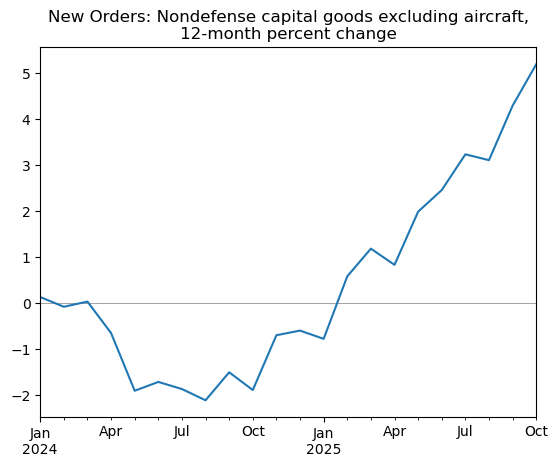

In [148]:
title = ('New Orders: Nondefense capital goods excluding aircraft,'+
         '\n12-month percent change')
data.loc['2024':].plot(title=title)
plt.axhline(0, lw=0.5, color='gray', zorder=0)
plt.show();